<div style="text-align: center; font-size: 36px; font-weight: bold;">
    Bitcoin Data Analysis
</div>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Read data & perform basic analysis!

In [4]:
btc_df = pd.read_csv(r'bitcoin_price_Training - Training.csv')

In [5]:
btc_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [7]:
btc_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

# Exploratory Data Analysis

In [8]:
btc_df.shape

(1556, 7)

In [9]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [12]:
btc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [11]:
# Check for any null values.
btc_df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [14]:
# Checking the data-types of the features.
btc_df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [15]:
# Convert Date feature from object to date-time.
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

In [16]:
btc_df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [17]:
# Check for duplicate rows.
btc_df.duplicated().sum()

0

In [23]:
# Now sort the dataset from oldest - recent
btc_df = btc_df.sort_index(ascending=False).reset_index()
btc_df.drop('index',axis=1,inplace=True)

# Analysing change in price of the Bitcoin overtime.

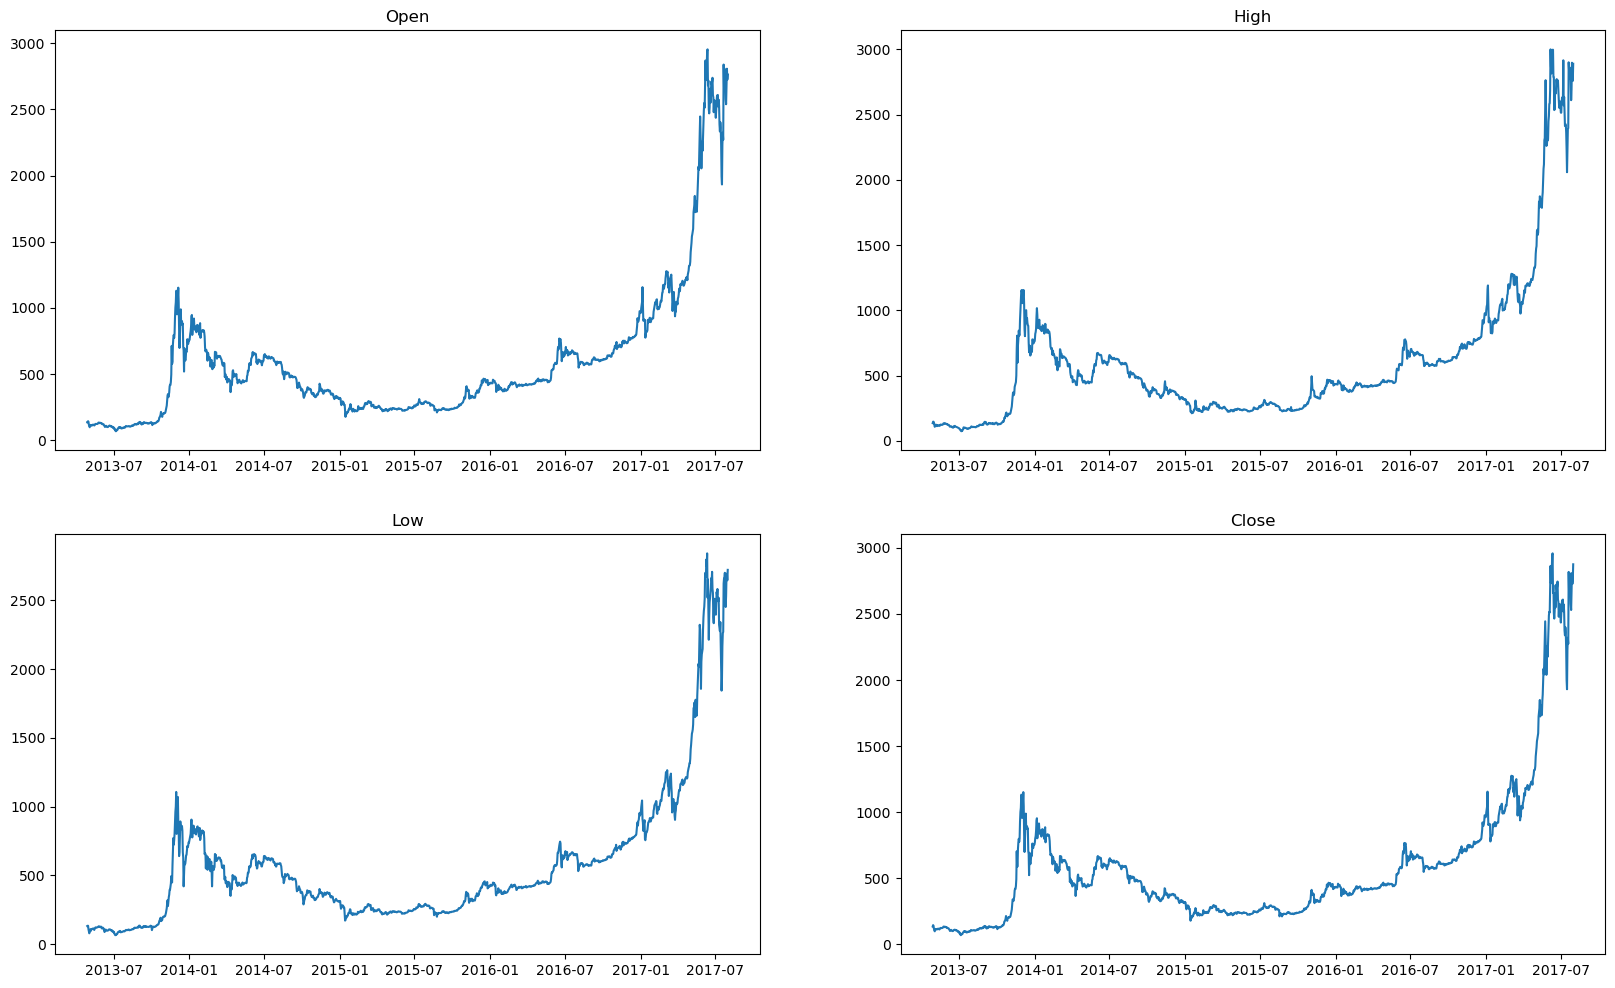

In [30]:
plt.figure(figsize=(20,12))

for index, col in enumerate(['Open','High','Low','Close'],1):
    plt.subplot(2,2,index)
    plt.plot(btc_df['Date'],btc_df[col])
    plt.title(col)

# Analysing Bitcoin price using Candle-stick chart


In [31]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [43]:
# consider sample of 50 data
sample_btc_df = btc_df[0:50]

In [44]:
trace =go.Candlestick(x=sample_btc_df['Date'],high= sample_btc_df['High'],open=sample_btc_df['Open'],low=sample_btc_df['Low'],close=sample_btc_df['Close'])

In [51]:
candle_data = [trace]
layout = {'title':'Bitcoin Historical Price','xaxis':{'title':'Date'}}

In [52]:
fig = go.Figure(data=candle_data,layout=layout)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# Analysing Closing Price in depth.

In [54]:
btc_df['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

In [57]:
btc_df.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

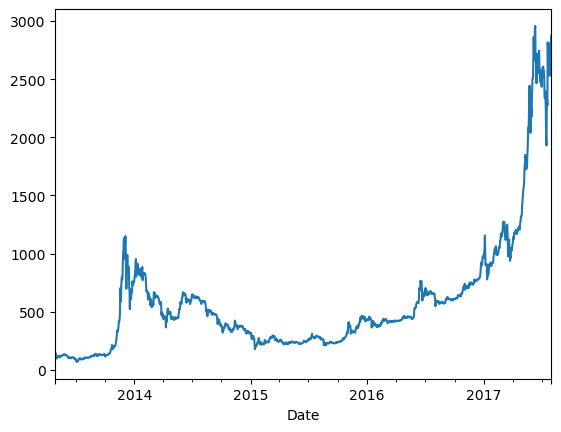

In [58]:
btc_df['Close'].plot()

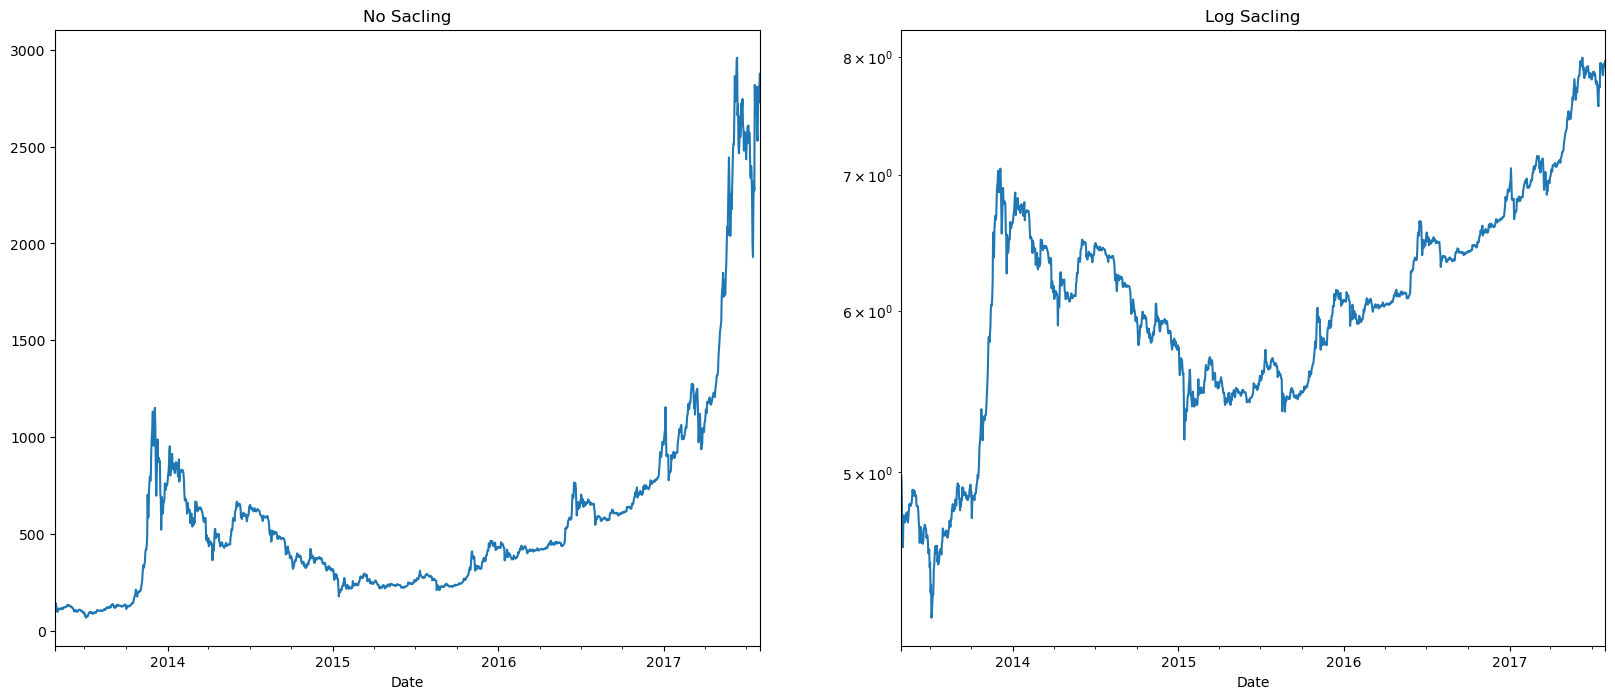

In [63]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
btc_df['Close'].plot()
plt.title('No Sacling')

plt.subplot(1,2,2)
np.log1p(btc_df['Close']).plot()
plt.title('Log Sacling')
plt.yscale('log')

Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases.

Log scale is always better if u have outliers or some high values in data.

Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers





# Perform Analysis on closing price on Yearly, Quarterly and monthly basis.


In [65]:
btc_df.head() 

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [66]:
# Finding avg price of bitcoin on yearly basis.
btc_df['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

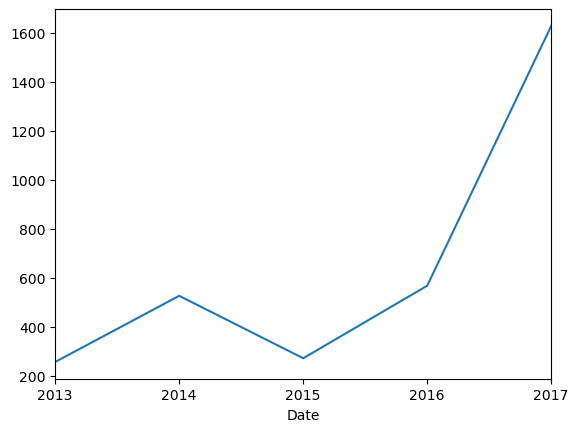

In [67]:
btc_df['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

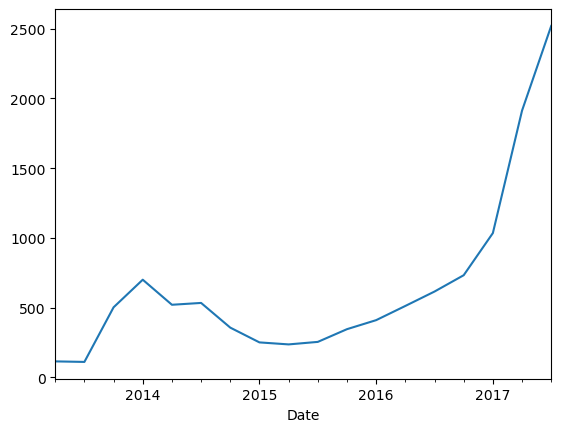

In [68]:
# Finding avg price of bitcoin on Quarterly basis.
btc_df['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

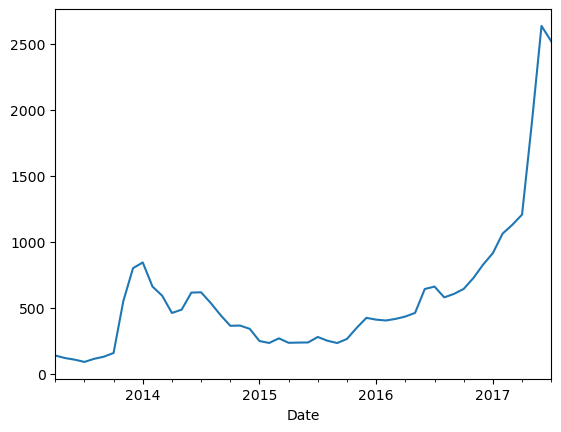

In [69]:
# Finding avg price of bitcoin on monthly basis.
btc_df['Close'].resample('M').mean().plot()

# Analysing daily change in Closing price of bitcoin.

In [73]:
btc_df['Close_price_pct_change'] = btc_df['Close'].pct_change()*100
btc_df['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

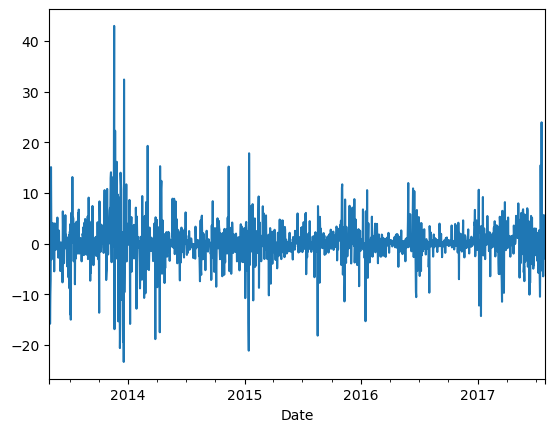

In [76]:
btc_df['Close_price_pct_change'].plot()


In [78]:
!pip install cufflinks
import cufflinks as cf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67900 sha256=c4870b67f383216b8ef4c9ce5e8fc39e481f31e66259ea22cbc6b5979fe0451f
  Stored in directory: /home/tt/.cache/pip/wheels/c3/bf/8f/afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [79]:
cf.go_offline()

In [80]:
btc_df['Close_price_pct_change'].iplot()